In [1]:
import h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
import tables
import matplotlib.pyplot as plt
import tensorflow as tf
import preprocessing


In [2]:
dataPath = '/home/WindowsDrive/Shared/Top_Tagging_Data/test.h5'
numJets = 1200000
maxConstits = 80

In [3]:
with h5py.File(dataPath, 'r') as data:

    npDataLabels = np.array(data['labels'])

    npDataWeights = np.array(data['weights'])
    
    hlDataArr = {key: data[key][...] for key in data.attrs.get('hl')}


## Preprocessing

In [4]:
processed_dict = preprocessing.high_level(hlDataArr)
processed_df = pd.DataFrame(processed_dict)


In [5]:
data_train, data_test, labels_train, labels_test, weights_train, weights_test = train_test_split(processed_df, npDataLabels, npDataWeights, test_size=0.33, random_state=69, shuffle=True)

In [6]:
# df_train = pd.DataFrame()
# df_train["label"] = labels_train
# df_train["weights"] = weights_train

# sigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])
# bkgSumWeights = np.sum(df_train[df_train["label"]==0]["weights"])

# print(sigSumWeights)

# scale = (bkgSumWeights/sigSumWeights)
# df_train.loc[df_train.label==1, "weights"] *= scale

# modsigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])

# print(modsigSumWeights)


# final_weights_train = df_train["weights"]

## Training now

In [7]:
model = Sequential()
model.add(keras.Input(shape=data_train.shape[1:]))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

2022-09-25 15:30:30.573107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 15:30:30.581719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 15:30:30.582025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 15:30:30.583006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
model.fit(data_train, labels_train, sample_weight=weights_train, epochs=8, batch_size=100, verbose=1)

Epoch 1/8
16644/16644 [==============================] - 51s 3ms/step - loss: 0.3709 - accuracy: 0.8405
Epoch 2/8
16644/16644 [==============================] - 52s 3ms/step - loss: 0.3572 - accuracy: 0.8473
Epoch 3/8
16644/16644 [==============================] - 58s 3ms/step - loss: 0.3544 - accuracy: 0.8491
Epoch 4/8
16644/16644 [==============================] - 49s 3ms/step - loss: 0.3527 - accuracy: 0.8501
Epoch 5/8
16644/16644 [==============================] - 49s 3ms/step - loss: 0.3513 - accuracy: 0.8507
Epoch 6/8
16644/16644 [==============================] - 44s 3ms/step - loss: 0.3505 - accuracy: 0.8513
Epoch 7/8
16644/16644 [==============================] - 44s 3ms/step - loss: 0.3498 - accuracy: 0.8517
Epoch 8/8
16644/16644 [==============================] - 44s 3ms/step - loss: 0.3493 - accuracy: 0.8518


In [19]:
pred_test = model.predict(data_test, verbose=1)

25618/25618 [==============================] - 30s 1ms/step


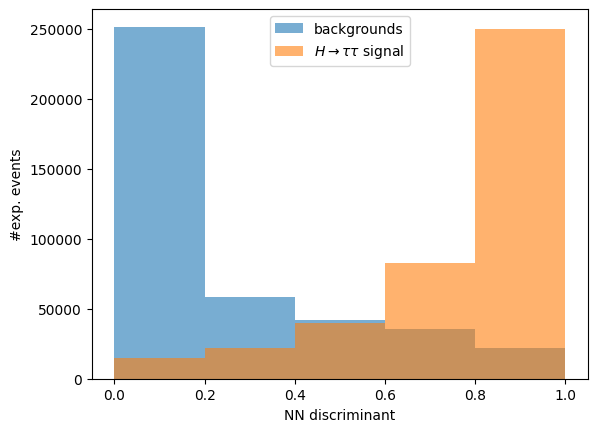

In [13]:
dfNN_test = pd.DataFrame()
dfNN_test["labels"] = labels_test
dfNN_test["predictions"] = pred_test
dfNN_test["weights"] = weights_test

signalVals = dfNN_test[dfNN_test['labels']== 1] 
backgroundVals = dfNN_test[dfNN_test['labels']== 0] 

plt.figure()
plt.xlabel("NN discriminant")
plt.ylabel("#exp. events")

bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

# bkgHistNN = plt.hist(backgroundVals['predictions'], bins=5, label="backgrounds", range=[0,1], alpha=0.6)
# sigHistNN = plt.hist(signalVals['predictions'], bins=5, label="signals", range=[0,1], alpha=0.6)

plt.legend()
# plt.yscale('log')
plt.show()

In [14]:
pred_train = model.predict(data_train)

52012/52012 [==============================] - 62s 1ms/step


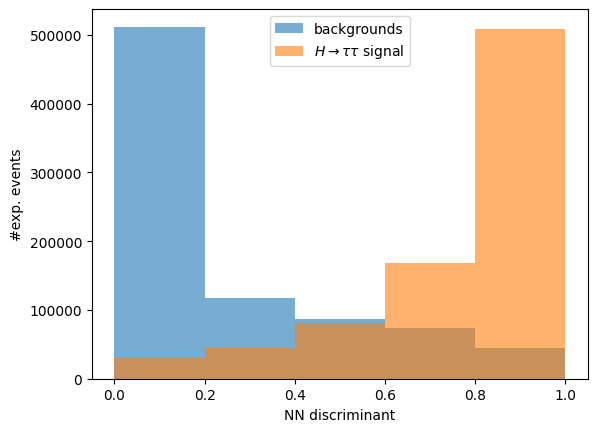

In [15]:
dfNN_train = pd.DataFrame()
dfNN_train["labels"] = labels_train
dfNN_train["predictions"] = pred_train
dfNN_train["weights"] = weights_train

signalVals = dfNN_train[dfNN_train['labels']== 1] 
backgroundVals = dfNN_train[dfNN_train['labels']== 0] 

plt.figure()
plt.xlabel("NN discriminant")
plt.ylabel("#exp. events")

bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

plt.legend()
#plt.yscale('log')
plt.show()

In [9]:
model.save('./models/highLevel_preprocessed_3_layers_correct_preprocessing')

INFO:tensorflow:Assets written to: ./models/highLevel_preprocessed_3_layers_correct_preprocessing/assets
